<a href="https://colab.research.google.com/github/deigo-lps/Image-Processing/blob/main/Atividade_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-637dca3dab62>:47: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20* np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))


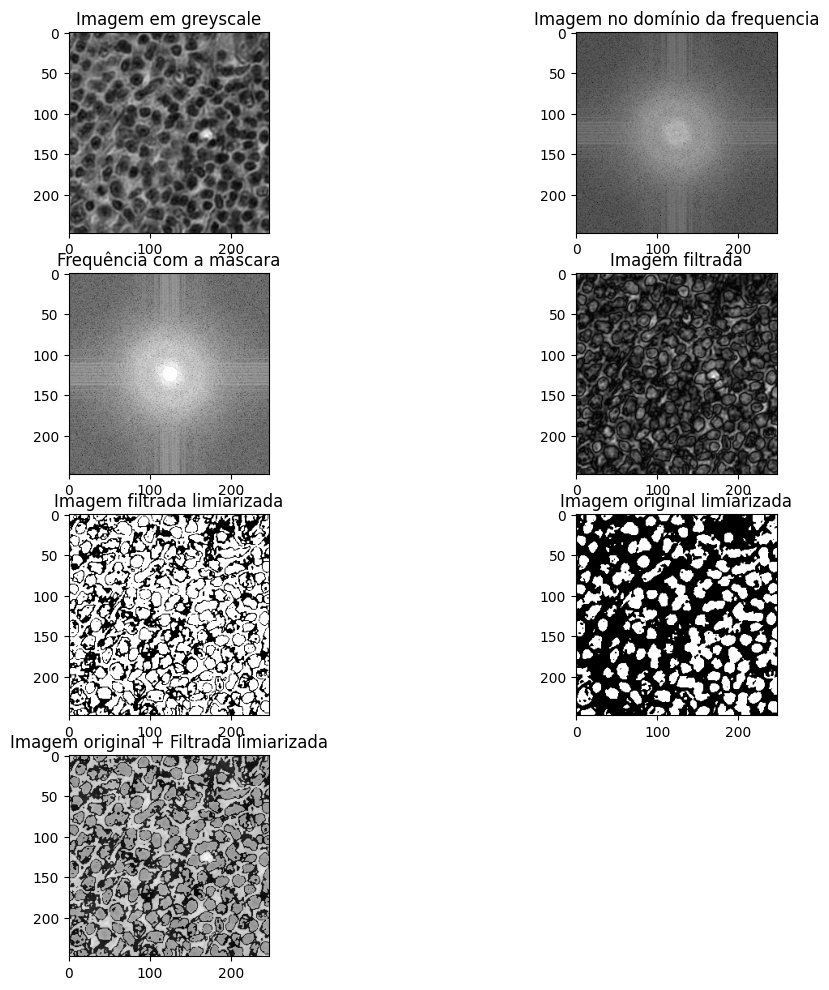

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('img.png',0)

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = gray.astype(np.float32)/255

# result = 255*np.floor(gray*255+0.5)/255
# result = result.clip(0,255).astype(np.uint8)
max_color = np.amax(img)
thresh4 = np.zeros(img.shape)
for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    if img[x][y] <=int( (max_color/2) - max_color/9):
      thresh4[x][y] = 1
    else:
      thresh4[x][y] = 0
dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20* np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# rows,cols = img.shape
# crow, ccol = int(rows/2),int(cols/2)
# mask = np.ones((rows,cols,2),np.uint8)
# radius = 6
# center = [crow,ccol]
# x,y = np.ogrid[:rows,:cols]
# mask_area = (x-center[0])**2 + (y-center[1])**2 <=radius*radius # circulo de filtro no centro
# mask[mask_area] = 0
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 255
r_in = 8
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1


fshift = dft_shift * mask
fshift_mask_mag = 20* np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
f_ishift = np.fft.ifftshift(fshift)

img_back =  cv2.idft(f_ishift)
img_back =  cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

max_color = np.amax(img_back)
thresh5 = np.zeros(img_back.shape)
for x in range(img_back.shape[0]):
  for y in range(img_back.shape[1]):
    if img_back[x][y] <=int( (max_color/2) - max_color/2.65):
      thresh5[x][y] = 0
    else:
      thresh5[x][y] = 1

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Imagem em greyscale')
ax2 = fig.add_subplot(4,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('Imagem no domínio da frequencia')
ax3 = fig.add_subplot(4,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('Frequência com a máscara')
ax4 = fig.add_subplot(4,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('Imagem filtrada')
ax5 = fig.add_subplot(4,2,5)
ax5.imshow(thresh5, cmap='gray')
ax5.title.set_text('Imagem filtrada limiarizada')
ax6 = fig.add_subplot(4,2,6)
ax6.imshow(thresh4, cmap='gray')
ax6.title.set_text('Imagem original limiarizada')
ax7 = fig.add_subplot(4,2,7)
ax7.imshow((img + thresh5*255), cmap='gray')
ax7.title.set_text('Imagem original + Filtrada limiarizada')
plt.show()